# Problem Statement:

Classify the traffic sign board using German traffic sign recognition 
benchmark (GTSRB) data in various classes.


# Dataset

The dataset we have used for this project is the GTSRB (German traffic sign recognition benchmark). It contains a Train folder that has 39,209 traffic sign images in 43 different classes, a Test folder that has over 12,631 images for testing purposes.
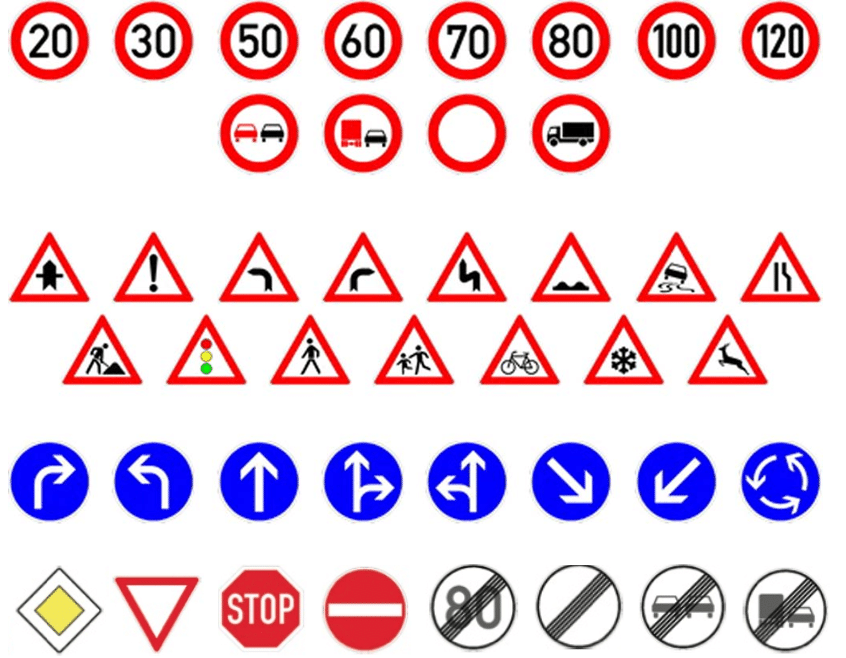

# Libraries Used:
1. Tensorflow
2. Numpy
3. Pandas
4. Matplotlib
5. PIL (Python Image Library)
6. Keras
7. Sklearn
8. OpenCV
9. OS

# Algorithm:

Convolutional Neural networks (CNN) 
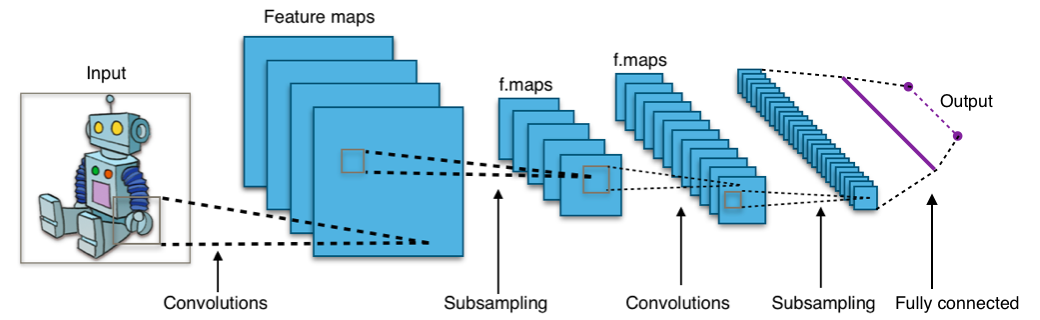

# Project assigned by:

Vaishali Sharma
Research Scholar,
Signals and Software Group,
Discipline of Electrical Engineering,
Indian Institute of Technology (IIT) Indore, India

# Submitted by:

Rushabh Gogoi
B.Tech in Computer Science and Engineering 
Assam Engineering College, Jalukbari, Guwahati

# Project Code: 

In [ ]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:\German traffic Sign Project')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [17]:
#Storing data and labels as lists

data =[]
labels = []
classes =43 
cur_path = os.getcwd()

In [18]:
#Retrieving the images and their labels

for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30))                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except:
            print("Error in loading the image")

In [19]:
#Converting the lists into numpy arrays

data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [20]:
#Saving labels and data for future use
#os.mkdir('training')
np.save('./training/data',data)
np.save('./training/labels',labels)

In [21]:
#Loading the data and labels

data=np.load('./training/data.npy')
labels=np.load('./training/labels.npy')
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [22]:
#Using sklearn train test split function to split the data into training and testing
#Using 80% train 20% test split ratio

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [23]:
#Converting labels into onehot encoding

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [27]:
#Building the CNN model

model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense 
model.add(Dense(43, activation='softmax'))

In [28]:
#Compilation of the model

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [29]:
#Training of the model

epochs = 20
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))
model.save("./training/TSR.h5")

Epoch 1/20
1961/1961 [==============================] - 123s 63ms/step - loss: 1.4787 - accuracy: 0.6003 - val_loss: 0.3283 - val_accuracy: 0.9074
Epoch 2/20
1961/1961 [==============================] - 138s 70ms/step - loss: 0.4865 - accuracy: 0.8560 - val_loss: 0.1253 - val_accuracy: 0.9647
Epoch 3/20
1961/1961 [==============================] - 143s 73ms/step - loss: 0.3127 - accuracy: 0.9105 - val_loss: 0.0717 - val_accuracy: 0.9801
Epoch 4/20
1961/1961 [==============================] - 129s 66ms/step - loss: 0.2356 - accuracy: 0.9333 - val_loss: 0.0611 - val_accuracy: 0.9842
Epoch 5/20
1961/1961 [==============================] - 130s 67ms/step - loss: 0.2241 - accuracy: 0.9387 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 6/20
1961/1961 [==============================] - 133s 68ms/step - loss: 0.1949 - accuracy: 0.9468 - val_loss: 0.0498 - val_accuracy: 0.9866
Epoch 7/20
1961/1961 [==============================] - 132s 67ms/step - loss: 0.2029 - accuracy: 0.9470 - val_loss: 0

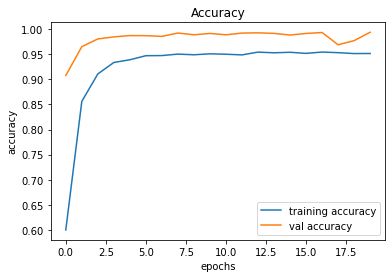

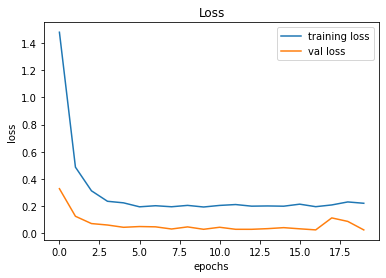

In [30]:
# Accuracy graph

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#loss graph

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
#Testing on test data

from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)

In [32]:
#Checking accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9619952494061758


Accuracy is 96.19%

In [33]:
#Classes of trafic signs

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [34]:
#Making predictions

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    pred = np.argmax(model.predict(X_test), axis=-1)
    return image,pred

Predicted traffic sign is:  Slippery road


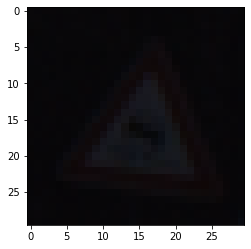

In [35]:
#sample image 00033.png

plot,prediction = test_on_img(r'D:\German traffic Sign Project\Test\00033.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  No passing


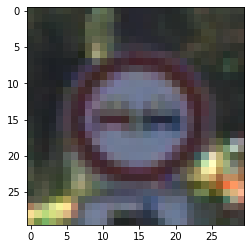

In [36]:
#sample image 00058.png

plot,prediction = test_on_img(r'D:\German traffic Sign Project\Test\00058.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Road work


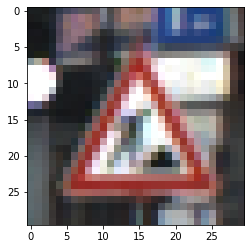

In [37]:
#sample image 00333.png

plot,prediction = test_on_img(r'D:\German traffic Sign Project\Test\00333.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Road work


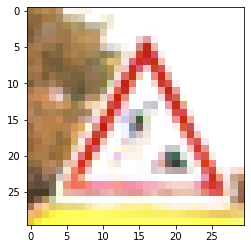

In [38]:
#sample image 00263.png

plot,prediction = test_on_img(r'D:\German traffic Sign Project\Test\00263.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Keep right


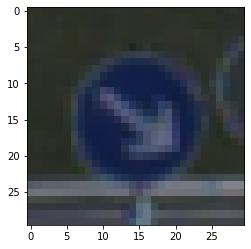

In [39]:
#sample image 11946.png

plot,prediction = test_on_img(r'D:\German traffic Sign Project\Test\11946.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()